# Imports and model 

In [1]:

import numpy as np
import pandas as pd
import librosa
import os
import sys
import re

import mlflow
from mlflow import log_metric, log_param, log_artifacts
from mlflow.exceptions import MlflowException
from mlflow.tracking import MlflowClient
from mlflow.keras import log_model
from IPython.display import Audio

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pickle


In [2]:
from helpers.preprocessing_helpers import *
from helpers.training_helpers import *
from helpers.exploration_helpers import *


2022-10-20 14:20:53.312539: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 14:20:53.544423: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
model_name = "NN_Sequential"
model_version = "001"
model = load_model(model_name, model_version)
encoder = load_encoder()


2022-10-20 14:20:55.427107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 14:20:55.487940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 14:20:55.488200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-20 14:20:55.488965: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFl

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          2304      
                                                                 
 activation (Activation)     (None, 162, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 162, 256)          524544    
                                                                 
 module_wrapper (ModuleWrapp  (None, 162, 256)         0         
 er)                                                             
                                                                 
 activation_1 (Activation)   (None, 162, 256)          0         
                                                                 
 dropout (Dropout)           (None, 162, 256)          0         
                                                        

# Other

In [13]:
test_file_path = "data/raw/CREMA_D/AudioWAV/1001_WSI_ANG_XX.wav"
data_path = pd.read_pickle(DATA_PATH_PICKLE)
{1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}

print(np.unique(np.array(data_path.Emotions.values)))

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


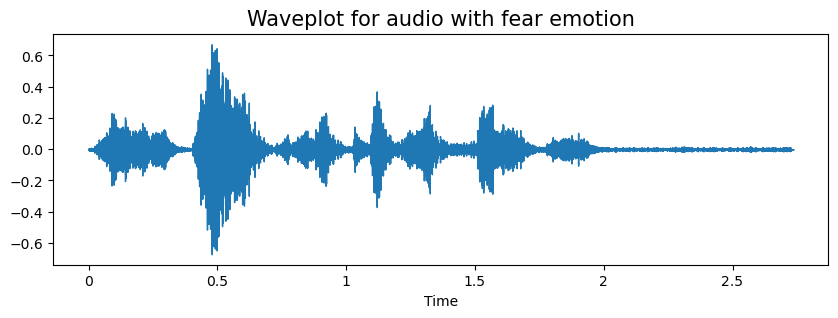

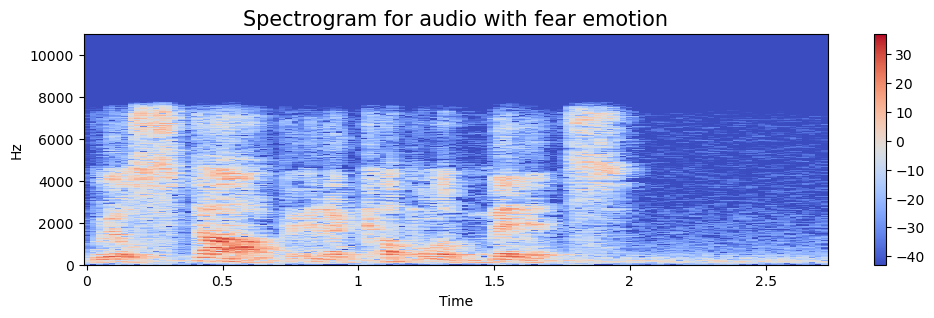

In [14]:
emotion='fear'
data, sampling_rate = librosa.load(test_file_path)
fig = create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(test_file_path)

In [15]:
audio = get_features(test_file_path)
#audio

In [16]:

pred = model.predict(audio)
pred


1/1 [==============================] - 0s 20ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
x_test = audio



In [18]:
encoder

OneHotEncoder()

In [19]:
y_pred = encoder.inverse_transform(pred)
y_pred

model.evaluate(x_test, pred)

1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [20]:
y_pred

array([['calm'],
       ['calm'],
       ['calm']], dtype=object)

In [21]:
import mlflow

In [22]:
with mlflow.start_run() as run:
    artifact_uri = run.info.artifact_uri
    mlflow.log_dict({"mlflow-version": "0.28", "n_cores": "10"}, "config.json")
    config_json = mlflow.artifacts.load_dict(artifact_uri + "/config.json")
    print(config_json)

{'mlflow-version': '0.28', 'n_cores': '10'}
